**Cookie Cats** это чрезвычайно популярная мобильная игра-головоломка, разработанная компанией Tactile Entertainment. Это классическая игра-головоломка в стиле "соедини три", в которой игрок должен соединить плитки одного цвета, чтобы очистить игровое поле и выиграть уровень. 

https://docs.google.com/spreadsheets/d/1Dj6c6pmdg1N_rL3T2zg4HxnBo7poBgm6-g-40ATIJmE/edit#gid=1733885895

https://www.kaggle.com/code/mursideyarkin/mobile-games-ab-testing-with-cookie-cats/data

По мере прохождения уровней игры игроки время от времени будут сталкиваться с вратами, которые заставляют их ждать нетривиальное количество времени или совершать покупки в приложении, чтобы прогрессировать. Помимо стимулирования покупок в приложении, эти ворота служат важной цели - дают игрокам вынужденный перерыв в игре, что, как мы надеемся, приведет к увеличению и продлению удовольствия игрока от игры.


Но где должны быть расположены ворота? Изначально первые врата были размещены на 30-м уровне, но в этой тетради мы собираемся проанализировать AB-тест, в котором мы переместили первые врата в Cookie Cats с 30-го на 40-й уровень. В частности, мы рассмотрим влияние на удержание игроков. Но прежде чем мы перейдем к этому, ключевым шагом перед проведением любого анализа является понимание данных. Так что давайте загрузим его и посмотрим!

In [8]:
# Importing pandas
import pandas as pd
# from google.colab import files
# uploaded = files.upload()

df = pd.read_csv('.\результаты А_B - cookie_cats 2.csv') 
df.head(10)

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,0,0
1,337,gate_30,38,1,0
2,377,gate_40,165,1,0
3,483,gate_40,1,0,0
4,488,gate_40,179,1,1
5,540,gate_40,187,1,1
6,1066,gate_30,0,0,0
7,1444,gate_40,2,0,0
8,1574,gate_40,108,1,1
9,1587,gate_40,153,1,0


In [9]:
# import pandas as pd
# import matplotlib.pyplot as plt

# df = pd.read_csv('/content/cookie_cats_new1.csv')


In [10]:
#check head
df.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,0,0
1,337,gate_30,38,1,0
2,377,gate_40,165,1,0
3,483,gate_40,1,0,0
4,488,gate_40,179,1,1


In [11]:
# Integrity Check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90189 entries, 0 to 90188
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   userid          90189 non-null  int64 
 1   version         90189 non-null  object
 2   sum_gamerounds  90189 non-null  int64 
 3   retention_1     90189 non-null  int64 
 4   retention_7     90189 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 3.4+ MB


In [12]:
# Describe
df.describe()

,userid,sum_gamerounds,retention_1,retention_7
count,9.018900e+04,90189.000000,90189.000000,90189.000000
mean,4.998412e+06,51.872457,0.445210,0.186065
std,2.883286e+06,195.050858,0.496992,0.389161
min,1.160000e+02,0.000000,0.000000,0.000000
25%,2.512230e+06,5.000000,0.000000,0.000000
50%,4.995815e+06,16.000000,0.000000,0.000000
75%,7.496452e+06,51.000000,1.000000,0.000000
max,9.999861e+06,49854.000000,1.000000,1.000000


In [13]:
# Check levels
df.version.unique()

array(['gate_30', 'gate_40'], dtype=object)

In [14]:
df = df[df.sum_gamerounds < 3000]

In [15]:
# Describe
df.describe()

,userid,sum_gamerounds,retention_1,retention_7
count,9.018800e+04,90188.000000,90188.000000,90188.000000
mean,4.998397e+06,51.320253,0.445214,0.186056
std,2.883298e+06,102.682719,0.496992,0.389154
min,1.160000e+02,0.000000,0.000000,0.000000
25%,2.512211e+06,5.000000,0.000000,0.000000
50%,4.995804e+06,16.000000,0.000000,0.000000
75%,7.496461e+06,51.000000,1.000000,0.000000
max,9.999861e+06,2961.000000,1.000000,1.000000


### **ВЫВОДЫ**

У нас есть **90189** строк и 5 столбцов, все поля заполнены. Отлично!

Столбцами являются userid, version, sum_gamerounds, retention_1 и retention_7.
Четыре столбца содержат числа, а один объекты.

Как и в большинстве “бесплатных” мобильных игр, в создании продукта есть экономический элемент для получения дохода.
В этом случае после стольких уровней наступает принудительный период охлаждения, который игрок может удалить, заплатив определенную плату.
Столбец версии в нашем фрейме данных отражает версии с различными воротами, препятствующими прогрессу игрока, после 30 уровней или после 40, они записываются как gate_30 и gate_40.

Эти две версии дают нам прекрасную отправную точку для тестирования AB.

**Sanity Check**

Давайте сначала определим размеры выборок, с которыми мы имеем дело, чтобы убедиться, что мы можем приступить к статистически обоснованному сравнению.

In [16]:
# Counting the number of players in each AB group.
A = df.version.groupby(df.version == "gate_30").count()
B = df.version.groupby(df.version == "gate_40").count()
print(A)
print(B)


version
False    45489
True     44699
Name: version, dtype: int64
version
False    44699
True     45489
Name: version, dtype: int64


Из общего числа наших 90 189 записей примерно половина использует версию gate_30 (которую мы будем называть группой A), а другая половина использует версию gate_40 (которую мы будем называть версией B).

Это здорово, мы можем приступить к анализу.



In [17]:
from scipy.stats import mannwhitneyu
from scipy.stats import ttest_ind

In [18]:
mannwhitneyu(df[df.version == 'gate_30'].sum_gamerounds, 
             df[df.version == 'gate_40'].sum_gamerounds)

MannwhitneyuResult(statistic=1024285761.5, pvalue=0.05089155279145376)

In [19]:
ttest_ind(df[df.version == 'gate_30'].sum_gamerounds, 
             df[df.version == 'gate_40'].sum_gamerounds)

Ttest_indResult(statistic=0.0633675766982082, pvalue=0.9494739458256001)

In [20]:
from scipy.stats import kstest
print(kstest(df['sum_gamerounds'][df.version == 'gate_30'], 'norm'))
print(kstest(df['sum_gamerounds'][df.version == 'gate_40'], 'norm'))

KstestResult(statistic=0.8724153079945488, pvalue=0.0)
KstestResult(statistic=0.8707186187388001, pvalue=0.0)


**Сколько времени пользователи играют?**

Мы хотим посмотреть, сколько и как долго игроки обычно остаются с продуктом. Один из способов измерить метрику в этом случае - проверить, сколько раундов играет каждый пользователь.

Поскольку мы используем фрейм данных Pandas, мы можем воспользоваться следующим подходом. Мы будем использовать .groupby(), чтобы установить для каждого пользователя значение bin и вернуть общее количество. Затем мы построим график того, сколько игроков активно в пределах заданного диапазона, показывая нам количество игроков в диапазоне 0-100 от общего количества сыгранных раундов.

Text(0.5, 1.0, 'Number of Game Rounds Players on the First Week')

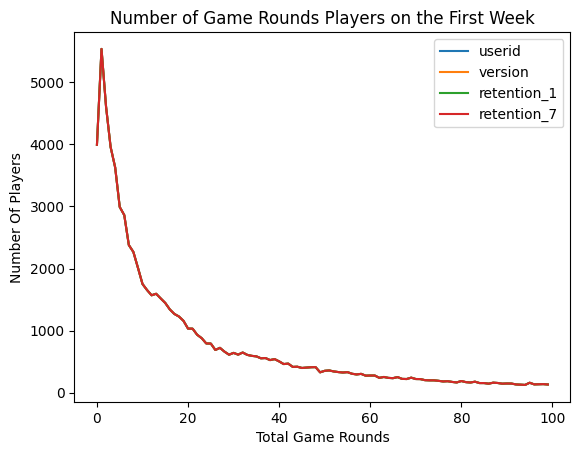

In [21]:
# Counting the number of players for each number of gamerounds 
plot_df = df.groupby("sum_gamerounds").count()

# Plotting the distribution of players that played 0 to 100 game rounds
ax = plot_df[:100].plot()
ax.set_xlabel("Total Game Rounds")
ax.set_ylabel("Number Of Players")
ax.set_title("Number of Game Rounds Players on the First Week")

#### **ВЫВОД:**

Похоже, что подавляющее большинство пользователей играют в общей сложности менее 20 раундов за время записи этих данных.

Давайте воспользуемся тем же подходом, чтобы посмотреть, есть ли большая разница в количестве игр, сыгранных в наших версиях AB, выделенных каждому пользователю.



## **Распределение по выборкам: A vs B Всего игр**

На этот раз нам нужно будет изучить данные немного подробнее. Мы также собираемся переключиться на наложенный гистограммный график различных распределений группы AB.

Поскольку мы уже определили, что отсев пользователей происходит менее чем за 20 сеансов, давайте также изменим наше распределение выборок, чтобы получить более детальное представление о низкой и высокой активности пользователей.




In [22]:
plt.style.use('ggplot')

# Counting the number of players for each number of gamerounds 
Group_A = df[df.version == 'gate_30']
print(Group_A.head())

Group_B = df[df.version == 'gate_40']
print(Group_B.head())

bins = [0,1,10,20,30,40,50,60,70,80,90,100,200,500]
plot_GA = pd.DataFrame(Group_A.groupby(pd.cut(Group_A["sum_gamerounds"], bins=bins)).count())
plot_GB = pd.DataFrame(Group_B.groupby(pd.cut(Group_B["sum_gamerounds"], bins=bins)).count())
#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html

    userid  version  sum_gamerounds  retention_1  retention_7
0      116  gate_30               3            0            0
1      337  gate_30              38            1            0
6     1066  gate_30               0            0            0
11    2101  gate_30               0            0            0
13    2179  gate_30              39            1            0
   userid  version  sum_gamerounds  retention_1  retention_7
2     377  gate_40             165            1            0
3     483  gate_40               1            0            0
4     488  gate_40             179            1            1
5     540  gate_40             187            1            1
7    1444  gate_40               2            0            0


Помните, что мы собираемся наложить наши графики, поэтому обратите особое внимание на один подход, который работает в нашем примере, где мы присваиваем второму графику параметр ax = ax, чтобы разрешить наложение второго распределения.

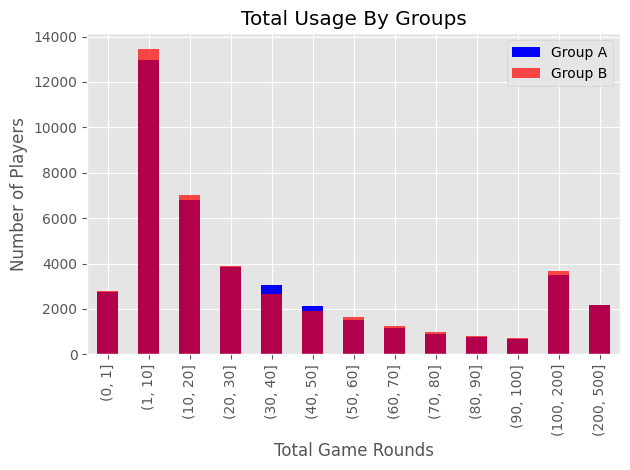

In [23]:
# Plotting the distribution of players that played 0 to 100 game rounds
ax = plot_GA.plot(kind = 'bar', y="userid", color = "blue", alpha = 1, 
                       title = 'Total Usage By Groups')
plot_GB.plot(kind = 'bar', y="userid", ax=ax, color = "red", alpha = 0.7 )
ax.set_xlabel("Total Game Rounds")
ax.set_ylabel("Number of Players")
plt.legend(["Group A", "Group B"])
plt.tight_layout()
plt.grid(True)


В целом, похоже, между этими двумя версиями нет большой разницы. Однако, по-видимому, существуют некоторые незначительные различия в пределах 30-40 сыгранных раундов, которые могут быть связаны с тестом AB.


**1-Day Retention**


Чего мы хотим, так это чтобы игрокам понравилась игра и они зацепились за нее. Распространенным показателем в индустрии видеоигр для определения того, насколько увлекательна игра, является удержание в течение 1 дня: процент игроков, которые возвращаются и играют в игру через день после ее установки. Чем выше срок удержания в течение 1 дня, тем легче удержать игроков и создать большую базу игроков.

В качестве шага давайте посмотрим, что такое 1-дневное удержание в целом.



In [24]:
# Calculate percent of returning users - next day
oneday = df.retention_1.sum()/df.retention_1.count()
print(str(oneday*100)+"%")


44.521444094558035%



**44.52095044850259%**
вернулись на следующий день после установки продукта.

Чуть меньше половины? Хорошо, просто из любопытства, есть ли какая-либо фундаментальная разница в наших двух группах пользователей с самого начала, независимо от влияния версии? На этот раз давайте поступим так, как мы делали выше, но на этот раз сгруппируем их по группам версий и посмотрим, какие получатся цифры.



In [25]:
# Calculating 1-day retention for each AB-group
oneday = df.retention_1.groupby(df.version).sum()/df.retention_1.groupby(df.version).count()
print(oneday)


version
gate_30    0.448198
gate_40    0.442283
Name: retention_1, dtype: float64


Похоже, что независимо от версии, результаты на следующий день практически одинаковы между нашими экспериментальными группами.

Но есть потери в 0,6% среди игроков, рандомизированных на 40 раундовых воротах ... может ли это быть значительным? Возможно, этот продукт увидят миллионы пользователей, и эти дополнительные 0,6% могут вылиться в некоторых платящих клиентов и / или рекламные доллары.

Это стоит исследовать.

Мы можем использовать *Bootstrapping*, чтобы проверить нашу гипотезу. Бутстрэппинг используется во многих дисциплинах, таких как молекулярная биология, чтобы помочь анализу филогенетики, повторно отобрать и заменить данные и проверить нашу статистическую достоверность наших результатов.

# **Bootstrapping Means Sampling**

In [26]:
# Creating an list with bootstrapped means for each AB-group
boot_1d = []
for i in range(500):
    boot_mean = df.retention_1.sample(frac=1, replace=True).groupby(df.version).mean()
    boot_1d.append(boot_mean)
#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sample.html    

# Transforming the list to a DataFrame
boot_1d = pd.DataFrame(boot_1d)
print(boot_1d)
    


version       gate_30   gate_40
retention_1  0.451211  0.447036
retention_1  0.443922  0.439518
retention_1  0.448856  0.442379
retention_1  0.451193  0.441945
retention_1  0.447050  0.443767
...               ...       ...
retention_1  0.444294  0.439736
retention_1  0.447070  0.440406
retention_1  0.451004  0.442316
retention_1  0.450852  0.440905
retention_1  0.449471  0.445385

[500 rows x 2 columns]


Text(0.5, 0, 'The Average of 1-Day Retention')

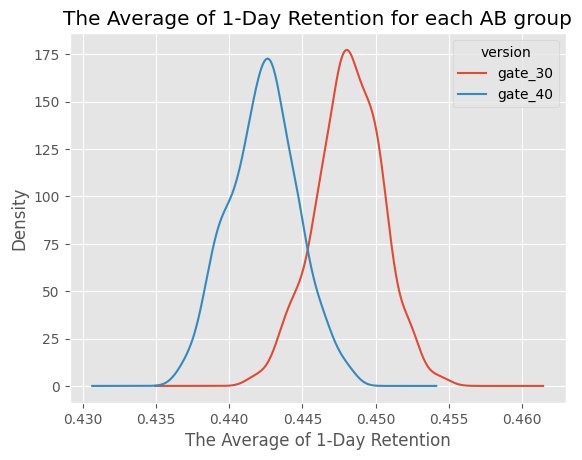

In [27]:
# A Kernel Density Estimate plot of the bootstrap distributions
#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.kde.html
ax= boot_1d.plot.kde()
ax.set_title("The Average of 1-Day Retention for each AB group")
ax.set_xlabel("The Average of 1-Day Retention")

**Zooming over % Difference**

Эти два распределения выше представляют собой неопределенность бутстрепа в отношении того, каким может быть базовое 1-дневное удержание для двух AB-групп. Давайте увеличим разницу в удержании в течение 1 дня.


Text(0.5, 1.0, 'Zooming % Difference')

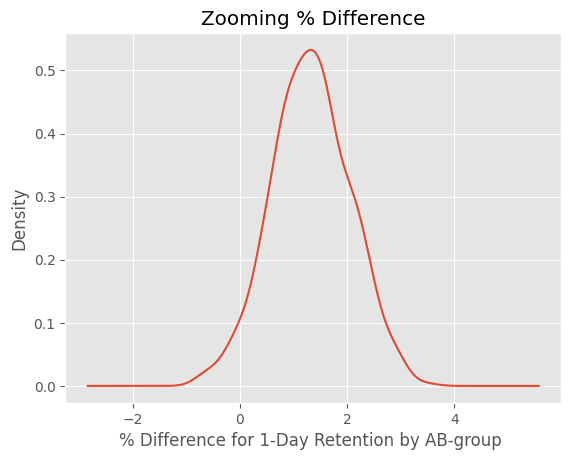

In [28]:
# Populate a new % Difference Column
boot_1d['difference'] = (boot_1d['gate_30'] - boot_1d['gate_40']) /  boot_1d['gate_40'] * 100

# Plot the new Column
ax = boot_1d['difference'].plot.kde()
ax.set_xlabel("% Difference for 1-Day Retention by AB-group ")
ax.set_title("Zooming % Difference")

Из этого графика мы можем видеть, что наиболее вероятная разница в процентах составляет около 1-2%, и что большая часть распределения выше 0% в пользу ворот на уровне 30. Но какова вероятность того, что разница превысит 0%?

In [29]:
prob =(boot_1d['difference'] > 0).sum() / len(boot_1d['difference'])
print(str(prob*100)+"%")


96.39999999999999%


**Overall 7 Day Retention**

Анализ говорит нам, что существует высокая вероятность того, что 1-дневное удержание лучше, когда ворота находятся на уровне 30. Однако, поскольку игроки играют в игру всего один день, вполне вероятно, что большинство игроков еще не достигли 30-го уровня. То есть многие игроки не пострадают от врат, даже если они уже достигли 30-го уровня.

Но после недельной игры большее количество игроков должно было достичь 40-го уровня, и поэтому имеет смысл также рассмотреть возможность 7-дневного удержания. То есть: какой процент людей, установивших игру, также появился неделю спустя, чтобы снова поиграть в игру.

Давайте начнем с расчета 7-дневного удержания для двух AB-групп.

In [30]:
# Calculating 7-day retention for both AB-groups
df.groupby('version')['retention_7'].sum() / df.groupby('version')['retention_7'].count()


version
gate_30    0.190183
gate_40    0.182000
Name: retention_7, dtype: float64

Как и в случае с 1-дневным удержанием, мы видим, что 7-дневное удержание немного ниже (18,2%), когда врата находятся на уровне 40, чем когда врата находятся на уровне 30 (19,0%). (ЧЕМ ОБЪЯСНИТЬ?) Эта разница также больше, чем при 1-дневном удержании, предположительно потому, что больше игроков успели поразить первые ворота. Но, как и прежде, давайте воспользуемся bootstrap-анализом, чтобы выяснить, насколько мы должны быть уверены в различии между AB-группами.

In [31]:
boot_7d = []
for i in range(500):
    boot_mean = df.retention_7.sample(frac=1, replace=True).groupby(df.version).mean()
    boot_7d.append(boot_mean)
    
# Transforming the list to a DataFrame
boot_7d = pd.DataFrame(boot_7d)
print(boot_7d.head())
# Adding a column with the % difference between the two AB-groups
boot_7d['diff'] = (boot_7d['gate_30'] - boot_7d['gate_40']) /  boot_7d['gate_40'] * 100



version       gate_30   gate_40
retention_7  0.194230  0.180851
retention_7  0.194934  0.183771
retention_7  0.187414  0.180947
retention_7  0.188986  0.180858
retention_7  0.188486  0.180628


1.0


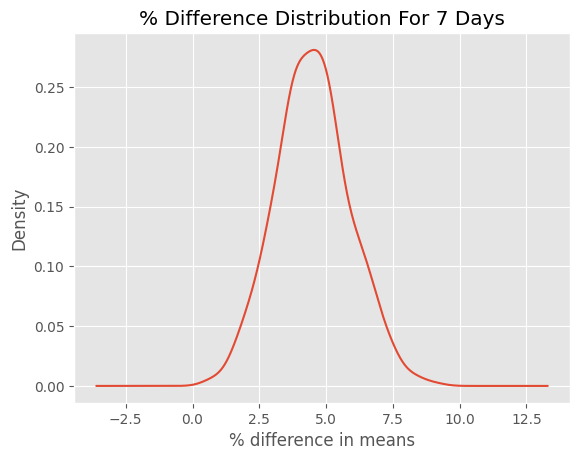

In [32]:
# Plotting the bootstrap % difference
ax = boot_7d['diff'].plot.kde()
ax.set_xlabel("% difference in means")
ax.set_title("% Difference Distribution For 7 Days")
# Calculating the probability that 7-day retention is greater when the gate is at level 30
prob = (boot_7d['diff'] > 0).sum() / len(boot_7d['diff'])

# Pretty printing the probability
print(prob)


## **ВЫВОД**

Результат начальной загрузки говорит нам, что есть убедительные доказательства того, что 7-дневное удержание выше, когда ворота находятся на уровне 30, чем когда они находятся на уровне 40. Вывод таков: если мы хотим сохранить высокий уровень удержания — как 1-дневное, так и 7-дневное удержание — мы не должны перемещать ворота с уровня 30 на уровень 40. Конечно, есть и другие показатели, на которые мы могли бы обратить внимание, например, количество сыгранных игровых раундов или количество внутриигровых покупок, сделанных двумя AB-группами. Но удержание - один из самых важных показателей. Если мы не сохраним нашу базу игроков, не имеет значения, сколько денег они тратят в игре.

Итак, почему удержание выше, когда ворота расположены раньше? Можно было бы ожидать обратного: чем позже возникнет препятствие, тем дольше люди будут заниматься игрой. Но это не то, о чем говорят нам данные. Теория гедонистической адаптации может дать этому одно объяснение. Короче говоря, гедонистическая адаптация - это тенденция людей получать все меньше и меньше удовольствия от веселой деятельности с течением времени, если эта деятельность осуществляется непрерывно. Заставляя игроков делать перерыв, когда они достигают ворот, они получают больше удовольствия от игры. Но когда ворота перемещаются на 40-й уровень, меньшему количеству игроков удается пройти достаточно далеко, и они с большей вероятностью выйдут из игры, потому что им это просто наскучило.

***Итого стоит оставить ворота на 30 уровне***

